SPAM DETECTION 

In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [45]:
cols = ["v1","v2"]
sms = pd.read_csv('German_spam_try.csv', encoding='latin-1',usecols=cols)
sms.head()

,v1,v2
0,ham,Ich bin franzose und bin seit ein paar Wochen ...
1,ham,Dieser Arzt ist das unmÃ¶glichste was mir in m...
2,spam,Hatte akute Beschwerden am RÃ¼cken. Herr Magur...
3,ham,Nachdem ich in der Klinik nur ungenaue Angaben...
4,ham,"Frau Dr. Vetter kenne ich seit vielen Jahren, ..."


In [46]:
sms.tail()

,v1,v2
15019,ham,Lange Zeit war ich auf der Suche nach einem gu...
15020,ham,Als ich das erste mal zu Dr. Burian wegen mein...
15021,ham,"Herr Dr. Raissi ist ein sehr kompetenter Arzt,..."
15022,ham,Kann super gut mit Kindern!!
15023,ham,Durch die Zusammenarbeit mit der Kontaklinsens...


In [47]:
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [48]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham     13016  12996                                 Bin sehr zufrieden    5
spam     2008   2008  Nach einem Umzug aus einer GroÃstadt suchte i...    1

In [49]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,Ich bin franzose und bin seit ein paar Wochen ...,259
1,ham,Dieser Arzt ist das unmÃ¶glichste was mir in m...,435
2,spam,Hatte akute Beschwerden am RÃ¼cken. Herr Magur...,170
3,ham,Nachdem ich in der Klinik nur ungenaue Angaben...,459
4,ham,"Frau Dr. Vetter kenne ich seit vielen Jahren, ...",387


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7906d7310>,
      dtype=object)

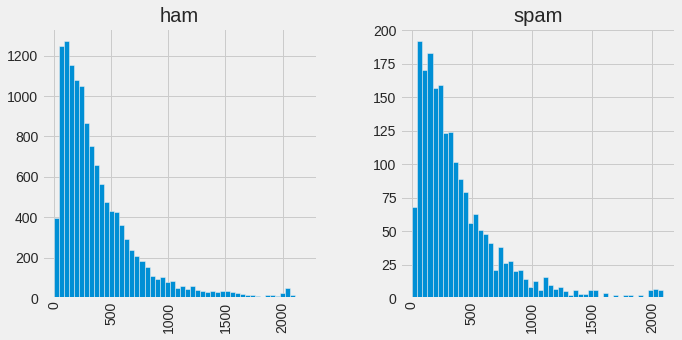

In [50]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('fivethirtyeight')
sms.hist(column='length', by='label', bins=50,figsize=(11,5))

Text processing and vectorizing our messages

In [51]:
text_feat = sms['message'].copy()
print(text_feat)

0        Ich bin franzose und bin seit ein paar Wochen ...
1        Dieser Arzt ist das unmÃ¶glichste was mir in m...
2        Hatte akute Beschwerden am RÃ¼cken. Herr Magur...
3        Nachdem ich in der Klinik nur ungenaue Angaben...
4        Frau Dr. Vetter kenne ich seit vielen Jahren, ...
                               ...                        
15019    Lange Zeit war ich auf der Suche nach einem gu...
15020    Als ich das erste mal zu Dr. Burian wegen mein...
15021    Herr Dr. Raissi ist ein sehr kompetenter Arzt,...
15022                         Kann super gut mit Kindern!!
15023    Durch die Zusammenarbeit mit der Kontaklinsens...
Name: message, Length: 15024, dtype: object


# ***Text precessing function: from nltk- stopwords ***

In [52]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('german')]
    
    return " ".join(text)

In [53]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

text_feat = text_feat.apply(text_process)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **TFIDF - TERM FREQUENCY INVERSE DOCUMENT FREQUENCY **

In [54]:
vectorizer = TfidfVectorizer("German")

In [55]:
features = vectorizer.fit_transform(text_feat)
print(features)

  (0, 43284)	0.3554327422642782
  (0, 28272)	0.14803785578135573
  (0, 2429)	0.15937886563462852
  (0, 26603)	0.13418865776464348
  (0, 35642)	0.1267924972381306
  (0, 5759)	0.15477832348454265
  (0, 35866)	0.10843988417795214
  (0, 32532)	0.1388577975976671
  (0, 11444)	0.18539166470317053
  (0, 24238)	0.29066299999459605
  (0, 9367)	0.07434604804749818
  (0, 21712)	0.37057274835959253
  (0, 32375)	0.2973390287227012
  (0, 42363)	0.2060265150839003
  (0, 25627)	0.3554327422642782
  (0, 41847)	0.17377560483729473
  (0, 28055)	0.19488817713171033
  (0, 33244)	0.1134497688470159
  (0, 13990)	0.37057274835959253
  (1, 25083)	0.11908981206179588
  (1, 7787)	0.12199980574250884
  (1, 19682)	0.2574686411113418
  (1, 36678)	0.2684357702816748
  (1, 42042)	0.174693614529704
  (1, 23553)	0.143205997515669
  :	:
  (15021, 18088)	0.26953696078486156
  (15021, 3194)	0.17802233320686375
  (15021, 9367)	0.14836749989420803
  (15022, 21177)	0.7719589426230827
  (15022, 35267)	0.5263031750749293
  (15

# **SPLIT THE FEATURES TO TEST & TRAIN SET**

In [56]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

 Importing the bunch of classifiers,initialize them  & make a dictionary to itereate through Dict

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [59]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

# **Creating functions to fit the classifiers and detection of Accuracy scores **

In [60]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [61]:
def predict_labels(clf, features):
    return (clf.predict(features))

Now iterate through classifiers and save the results

In [62]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))
pred_scores = dict(pred_scores)
print(pred_scores)

{'SVC': [0.8731144631765749], 'KN': [0.8742236024844721], 'NB': [0.8713398402839396], 'DT': [0.7868234250221828], 'LR': [0.8742236024844721], 'RF': [0.8688997338065662], 'AdaBoost': [0.8649068322981367], 'BgC': [0.8540372670807453], 'ETC': [0.8540372670807453]}


In [63]:
df =pd.DataFrame.from_dict(pred_scores,orient='index', columns=['Score'])
df

,Score
SVC,0.873114
KN,0.874224
NB,0.871340
DT,0.786823
LR,0.874224
RF,0.868900
AdaBoost,0.864907
BgC,0.854037
ETC,0.854037


df.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center', colormap="autumn" , hatch ='/')
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

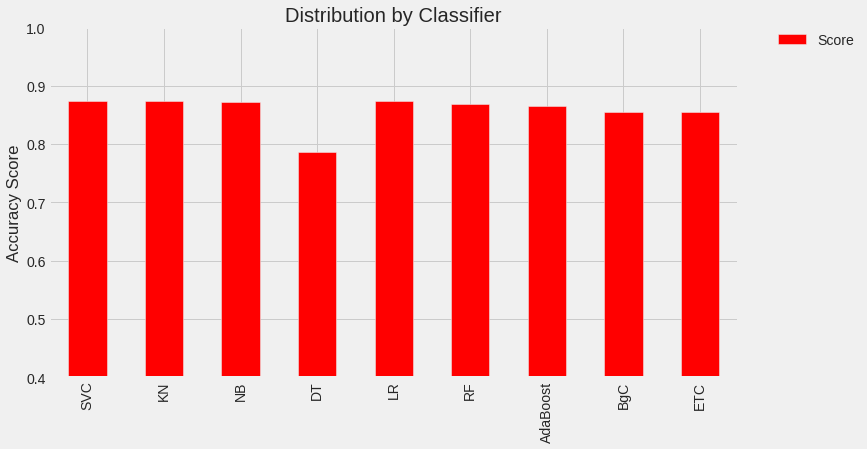

In [64]:
df.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center', colormap="autumn")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# **Snowball Stemmer**

In [65]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("german")
            words += (stemmer.stem(i))+" "
    return words

In [66]:
text_feat = text_feat.apply(stemmer)

In [67]:
features = vectorizer.fit_transform(text_feat)

In [68]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [69]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))
pred_scores=dict(pred_scores)
print(pred_scores)

{'SVC': [0.8728926353149956], 'KN': [0.8742236024844721], 'NB': [0.8708961845607809], 'DT': [0.7861579414374446], 'LR': [0.8742236024844721], 'RF': [0.8695652173913043], 'AdaBoost': [0.8673469387755102], 'BgC': [0.8535936113575865], 'ETC': [0.8586956521739131]}


In [70]:
df2 = pd.DataFrame.from_dict(pred_scores,orient='index', columns=['Score2'])
df = pd.concat([df,df2],axis=1)
df

,Score,Score2
SVC,0.873114,0.872893
KN,0.874224,0.874224
NB,0.871340,0.870896
DT,0.786823,0.786158
LR,0.874224,0.874224
RF,0.868900,0.869565
AdaBoost,0.864907,0.867347
BgC,0.854037,0.853594
ETC,0.854037,0.858696


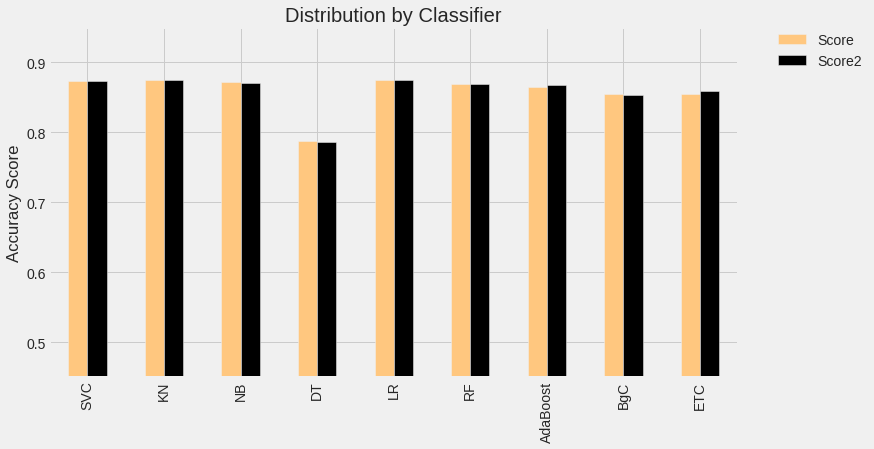

In [71]:
df.plot(kind='bar', ylim=(0.45,0.95), figsize=(11,6), align='center', colormap="copper_r")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)